In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

Importing the dataset and loading it into a pandas dataframe.

In [3]:
insurance = pd.read_excel('insurance.xlsx')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
type(insurance)

pandas.core.frame.DataFrame

checking the datatypes

In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

summary statistics of the numerical columns.

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking for the missing values

In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Regions data

In [6]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Gender data

In [7]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Total data if smokers in all the regions

In [8]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Ages data

In [9]:
insurance['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [10]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Graph on the insurance charges against all ages.

<BarContainer object of 1338 artists>

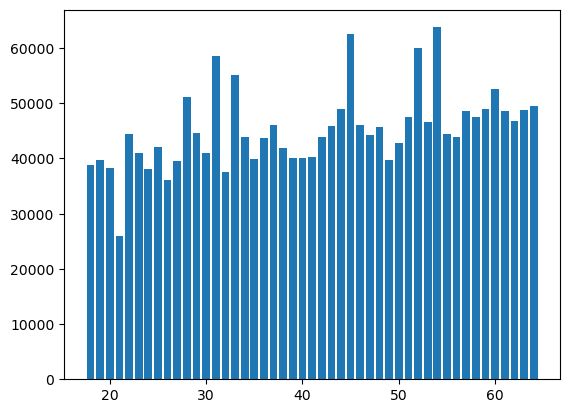

In [11]:
plt.bar(insurance['age'],insurance['charges'])

graph of charges against the smokers and non smokers

<BarContainer object of 1338 artists>

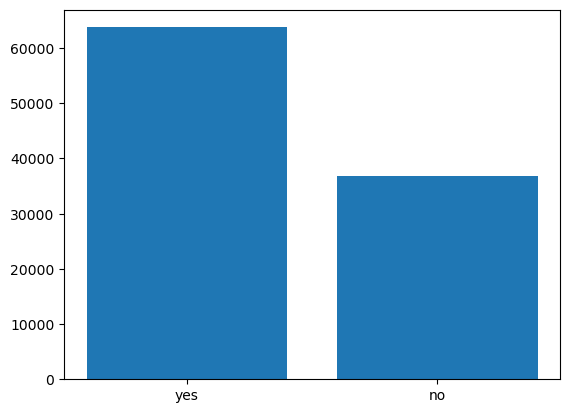

In [12]:
plt.bar(insurance['smoker'],insurance['charges'])

<BarContainer object of 1338 artists>

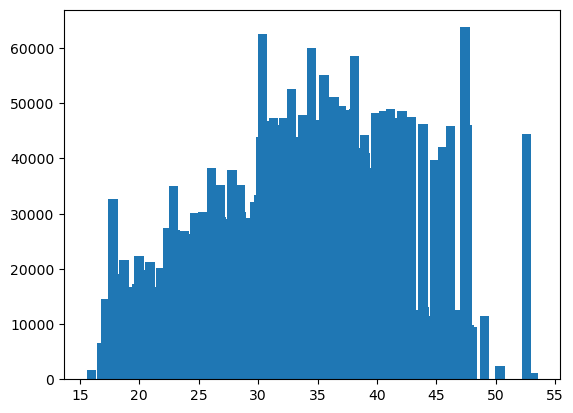

In [13]:
plt.bar(insurance['bmi'],insurance['charges'])

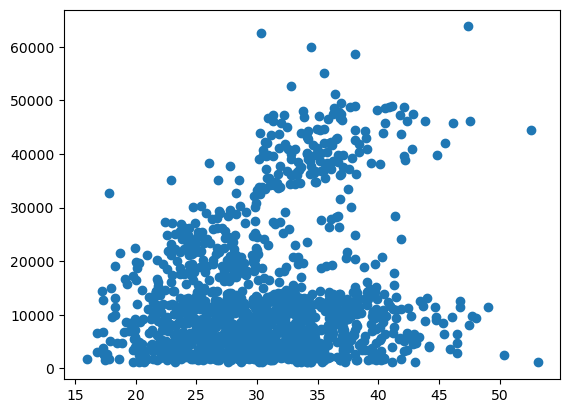

In [17]:
plt.scatter(insurance['bmi'],insurance['charges'])

In [17]:
yes_no = pd.pivot_table(insurance,index = 'smoker',values = 'charges',aggfunc = 'count')

In [16]:
yes_no

,charges
smoker,
no,8434.268298
yes,32050.231832


<AxesSubplot:xlabel='smoker'>

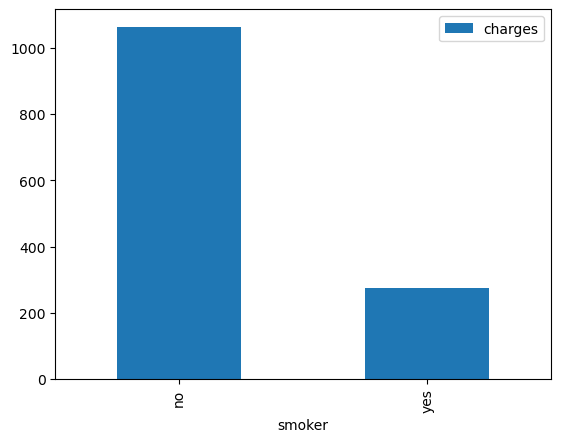

In [18]:
yes_no.plot(kind = 'bar')

In [23]:
excess_insurance = pd.pivot_table(insurance, index = 'region', columns = 'smoker', values = 'charges')

In [24]:
excess_insurance

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


<AxesSubplot:xlabel='region'>

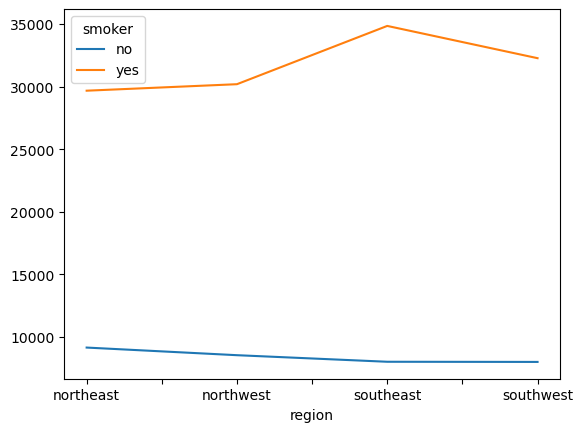

In [26]:
excess_insurance.plot()

<AxesSubplot:xlabel='region'>

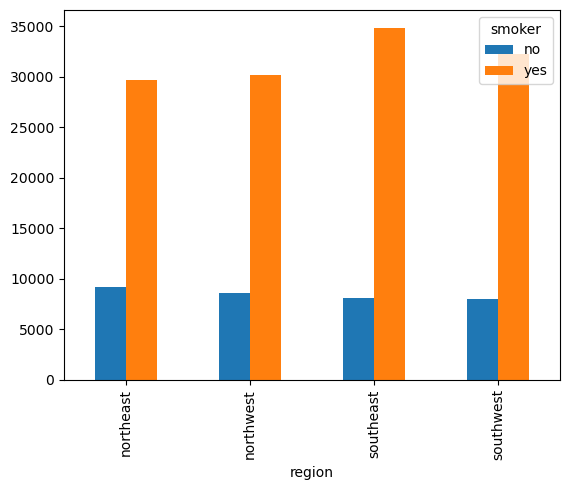

In [27]:
excess_insurance.plot(kind = 'bar')

<BarContainer object of 4 artists>

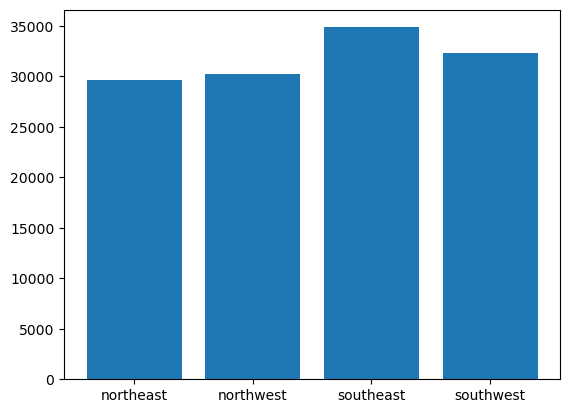

In [29]:
plt.bar(excess_insurance.index, excess_insurance.yes)

In [30]:
excess_insurance_sorted=excess_insurance.yes.sort_values()

In [31]:
excess_insurance_sorted

region
northeast    29673.536473
northwest    30192.003182
southwest    32269.063494
southeast    34844.996824
Name: yes, dtype: float64

<BarContainer object of 4 artists>

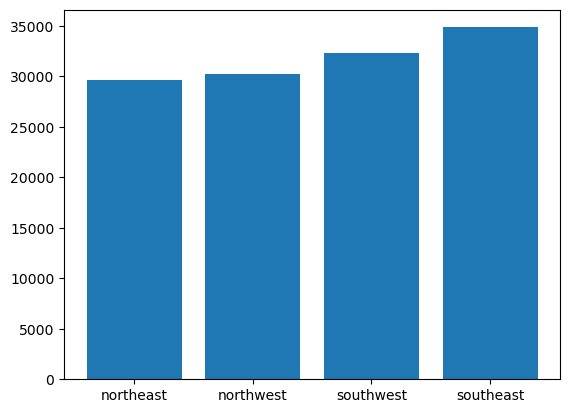

In [32]:
plt.bar(excess_insurance_sorted.index, excess_insurance_sorted.values)

In [9]:
M = insurance[insurance.sex == 'male']

In [10]:
M

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [11]:
F = insurance[insurance.sex == 'female']

In [12]:
F

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


distribution of the data using histograms.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

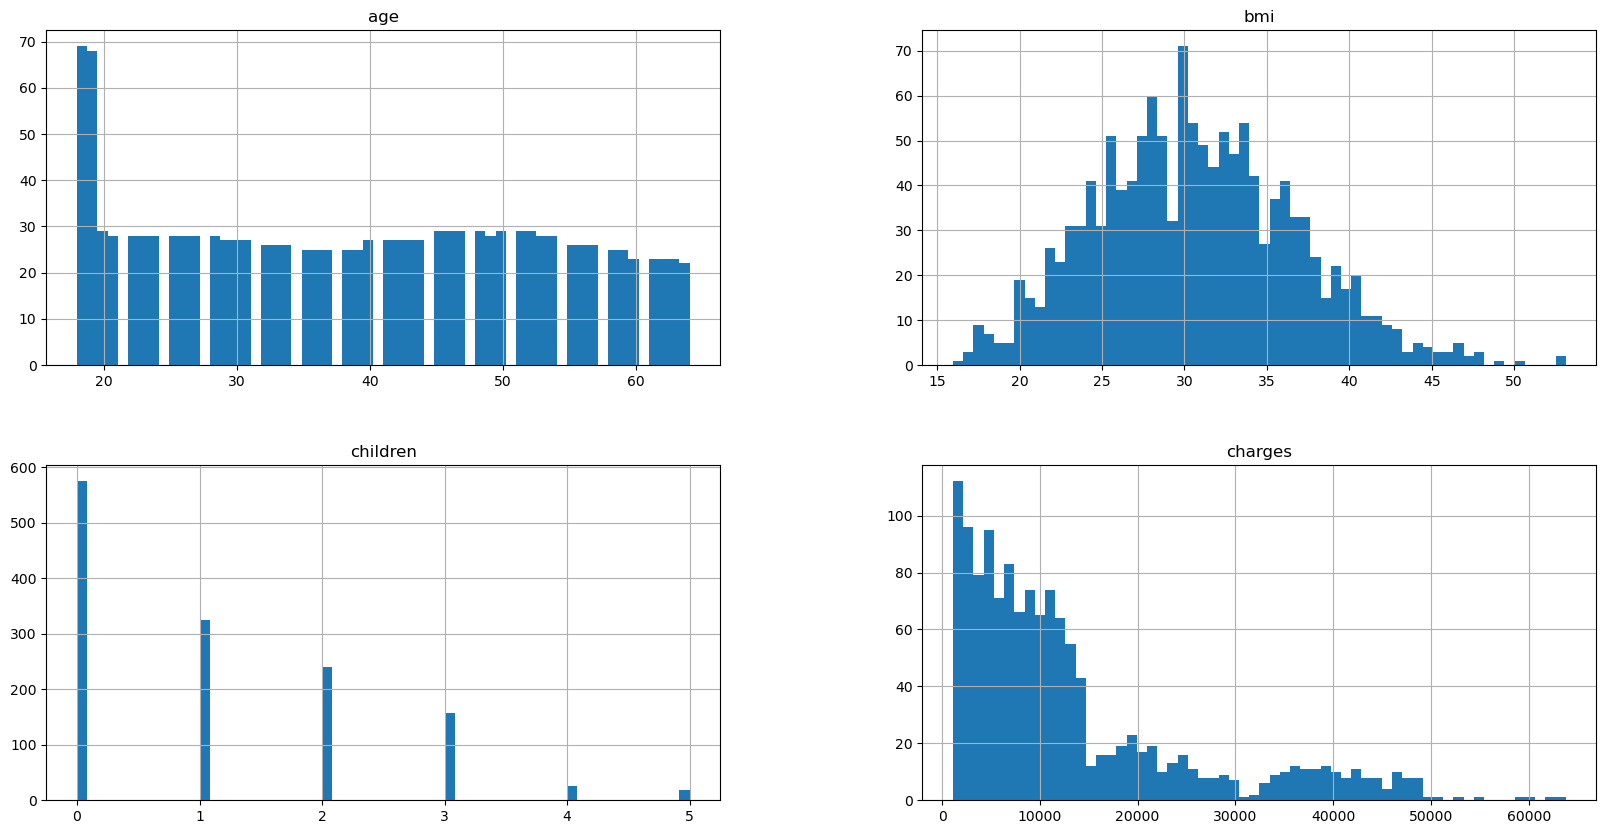

In [13]:
insurance.hist(bins = 60, figsize = (20,10))

Filtering Data.

In [15]:
insurance.loc[(insurance['sex'] == 'female') & (insurance['region'] == 'southwest') & (insurance['smoker'] == 'yes') ]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
84,37,female,34.8,2,yes,southwest,39836.51900
94,64,female,31.3,2,yes,southwest,47291.05500
126,19,female,28.3,0,yes,southwest,17081.08000
175,63,female,37.7,0,yes,southwest,48824.45000
251,63,female,32.2,2,yes,southwest,47305.30500
314,27,female,31.4,0,yes,southwest,34838.87300
328,64,female,33.8,1,yes,southwest,47928.03000
362,19,female,21.7,0,yes,southwest,13844.50600
417,36,female,22.6,2,yes,southwest,18608.26200


In [16]:
insurance.loc[(insurance['sex'] == 'male') & (insurance['region'] == 'southwest') & (insurance['smoker'] == 'yes') ]

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.3,0,yes,southwest,36837.46700
29,31,male,36.3,2,yes,southwest,38711.00000
30,22,male,35.6,0,yes,southwest,35585.57600
34,28,male,36.4,1,yes,southwest,51194.55914
39,60,male,39.9,0,yes,southwest,48173.36100
52,48,male,28.0,1,yes,southwest,23568.27200
99,38,male,19.3,0,yes,southwest,15820.69900
223,19,male,34.8,0,yes,southwest,34779.61500
271,50,male,34.2,2,yes,southwest,42856.83800
296,19,male,27.7,0,yes,southwest,16297.84600


LINEAR REGRESSION

splitting the data into target (y) and predictors (X)

In [25]:
y = insurance['charges']
X = insurance.drop('charges', axis=1)

convert categorical variables to one-hot encoded variables

In [26]:
X = pd.get_dummies(X)

fit a linear regression model

In [29]:
reg = LinearRegression().fit(X, y)

make predictions on the test data

In [30]:
y_pred = reg.predict(X)

In [31]:
df= pd.DataFrame(data={"actual values": y, "predicted values": y_pred})
df
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
0,16884.92400,25293.713028,8408.789028
1,1725.55230,3448.602834,1723.050534
2,4449.46200,6706.988491,2257.526491
3,21984.47061,3754.830163,-18229.640447
4,3866.85520,5592.493386,1725.638186
...,...,...,...
1333,10600.54830,12351.323686,1750.775386
1334,2205.98080,3511.930809,1305.950009
1335,1629.83350,4149.132486,2519.298986
1336,2007.94500,1246.584939,-761.360061


calculate evaluation metrics

In [34]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [35]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 4170.886894163591
MSE: 36501893.00741544
RMSE: 6041.6796511744515
